# Pandas Basics

In [2]:
import pandas as pd
from urllib.request import urlretrieve

In [3]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x7f7bc853ca90>)

In [4]:
df = pd.read_csv('italy-covid-daywise.csv')
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [5]:
# View basic info about rows, columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [6]:
# View statistical info about numerical columns
df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [7]:
# Get the list of colums
df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [8]:
df.shape

(248, 4)

## Retrieving Data

In [9]:
df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [10]:
# Retrieve at a specific location
df['new_tests'][243]

53541.0

In [11]:
# at method can also directly retrieve at a specific row and column
df.at[243, 'new_tests']

53541.0

In [12]:
# Access multiple columns together
cases_df = df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [13]:
# The full data can be also copied instead of being viewed
covid_df = cases_df.copy()

In [14]:
# Using loc
df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [15]:
df.tail(4)

,date,new_cases,new_deaths,new_tests
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [16]:
# First n cells
df.head(4)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN


In [17]:
df.new_tests.first_valid_index()

111

In [18]:
# To retrieve a random sample of rows from the database
df.sample(10)

,date,new_cases,new_deaths,new_tests
199,2020-07-17,230.0,20.0,28661.0
3,2020-01-03,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
59,2020-02-28,250.0,5.0,NaN
186,2020-07-04,223.0,15.0,28946.0
110,2020-04-19,3491.0,480.0,NaN
206,2020-07-24,306.0,10.0,28970.0
176,2020-06-24,113.0,18.0,30237.0
155,2020-06-03,318.0,55.0,20035.0
173,2020-06-21,264.0,49.0,24581.0


## Analyzing the Data

In [19]:
total_cases = df.new_cases.sum()
total_cases

271515.0

In [20]:
death_rate = df.new_deaths.sum()/total_cases
death_rate

0.13073679170579894

In [21]:
total_tests = df.new_tests.sum() + 935310
total_tests

5214766.0

## Quering and sorting Data

In [22]:
high_new_cases = df.new_cases > 1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [23]:
df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [24]:
pos_rate = 0.052
positive_rate = df[df.new_cases/df.new_tests > pos_rate]
positive_rate

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [25]:
# Adding to the dataset
df['positive_rate'] = df.new_cases/df.new_tests
df.sample(5)

,date,new_cases,new_deaths,new_tests,positive_rate
225,2020-08-12,412.0,6.0,27330.0,0.015075
214,2020-08-01,379.0,9.0,31905.0,0.011879
161,2020-06-09,280.0,65.0,32200.0,0.008696
189,2020-07-07,208.0,8.0,22490.0,0.009249
191,2020-07-09,193.0,15.0,29947.0,0.006445


In [26]:
# Columns can be dropped using the drop method
df.drop(columns='positive_rate', inplace=True)
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


## Sorting rows using column values

In [27]:
df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [28]:
df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [29]:
df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


In [30]:
df.at[172, 'new_cases'] = (df.at[171, 'new_cases']+df.at[173, 'new_cases'])/2
df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


## Working with Dates

In [31]:
df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [32]:
df.date = pd.to_datetime(df.date)

In [33]:
df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [34]:
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df['day'] = pd.DatetimeIndex(df.date).day
df['weekday'] = pd.DatetimeIndex(df.date).weekday
df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [35]:
# Query the rows for May
df_may = df[df.month == 5]
df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [36]:
# Extract the subset of columns to be aggregated
df_may_metrics = df_may[['new_cases', 'new_deaths', 'new_tests']]
df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [38]:
may_total = df_may_metrics.sum()
may_total

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [39]:
# Using a single line
df[df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [40]:
# Overall Average
df.new_cases.mean()

1096.6149193548388

In [41]:
# Average for Sundays
df[df.weekday == 6].new_cases.mean()

1247.2571428571428

## Group By and aggregation

In [43]:
covid_month_df = df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']]
covid_month_df['new']

In [45]:
monthly_grps = df.groupby('month')
monthly_grps[['new_cases', 'new_deaths', 'new_tests']].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [46]:
covid_week_df = df.groupby('weekday')[['new_cases', 'new_deaths', 'new_tests']]
covid_week_df.mean()

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1198.528571,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


In [47]:
df['total_cases'] = df.new_cases.cumsum()
df['total_tests'] = df.new_tests.cumsum()
df['total_deaths'] = df.new_deaths.cumsum()
df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_tests,total_deaths
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,NaN,0.0
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,NaN,0.0
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,NaN,0.0
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,NaN,0.0
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,4182478.0,35473.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,4225061.0,35477.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,4279456.0,35483.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,NaN,35491.0


## Merging data from different sources

In [48]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv',
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x7f7bd8d55060>)

In [49]:
loc = pd.read_csv('locations.csv')
loc

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [50]:
loc[loc.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [51]:
df['location'] = 'Italy'
df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_tests,total_deaths,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,NaN,0.0,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,NaN,0.0,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,NaN,0.0,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,NaN,0.0,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,NaN,0.0,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,4182478.0,35473.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,4225061.0,35477.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,4279456.0,35483.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,NaN,35491.0,Italy


In [52]:
merged_df = df.merge(loc, on='location')
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_tests,total_deaths,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,4182478.0,35473.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,4225061.0,35477.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,4279456.0,35483.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,NaN,35491.0,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [55]:
merged_df['Cases_per_million'] = merged_df.total_cases *  1e6 / merged_df.population
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_tests,total_deaths,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,Cases_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,NaN,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,4182478.0,35473.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,4225061.0,35477.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,4279456.0,35483.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,NaN,35491.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695


## Writing data back to a file

In [56]:
result_df = merged_df[[
    'date',
    'new_cases',
    'total_cases',
    'new_deaths',
    'total_deaths',
    'new_tests',
    'total_tests',
    'Cases_per_million',
]]
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,Cases_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,4182478.0,4420.946386
244,2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,4225061.0,4443.522614
245,2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,4279456.0,4459.995818
246,2020-09-02,975.0,270634.5,8.0,35491.0,NaN,NaN,4476.121695


In [ ]:
# Saving while ignoring the index number
result_df.to_csv('results.csv', index=None)

## Plotting with Pandas

<AxesSubplot: >

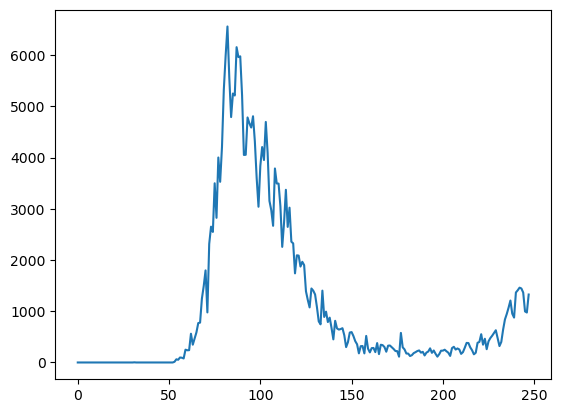

In [58]:
result_df.new_cases.plot()

In [60]:
result_df.set_index('date', inplace=True)
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,Cases_per_million
date,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000
...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,4182478.0,4420.946386
2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,4225061.0,4443.522614
2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,4279456.0,4459.995818


<AxesSubplot: xlabel='date'>

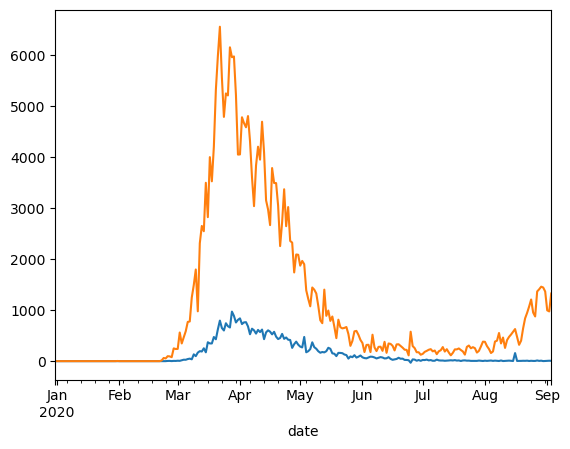

In [61]:
result_df.new_deaths.plot()
result_df.new_cases.plot()

<AxesSubplot: title={'center': 'Death Rate'}, xlabel='date'>

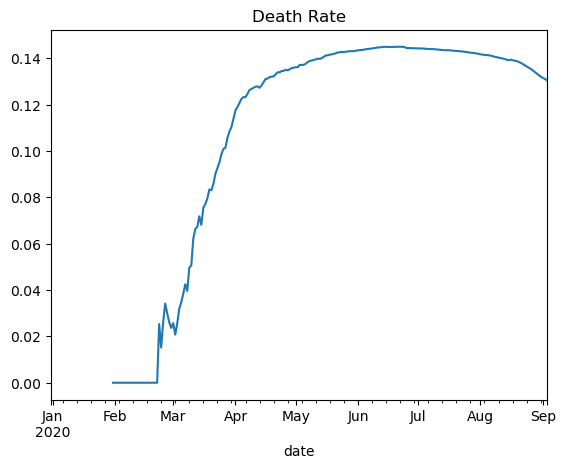

In [63]:
death_rate = result_df.total_deaths / result_df.total_cases
death_rate.plot(title='Death Rate')

<AxesSubplot: title={'center': 'Positive Rates'}, xlabel='date'>

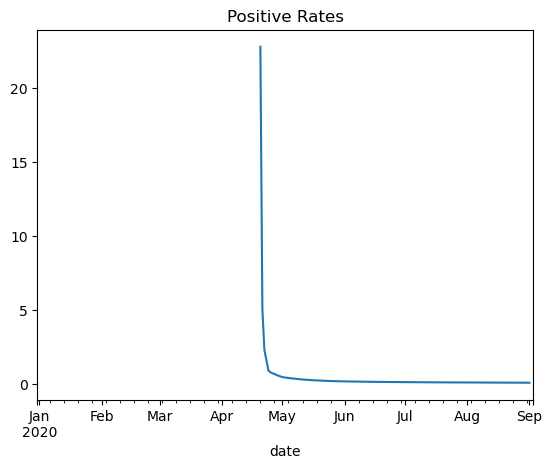

In [65]:
positive_rate = result_df.total_cases / result_df.total_tests
positive_rate.plot(title='Positive Rates')

<AxesSubplot: xlabel='month'>

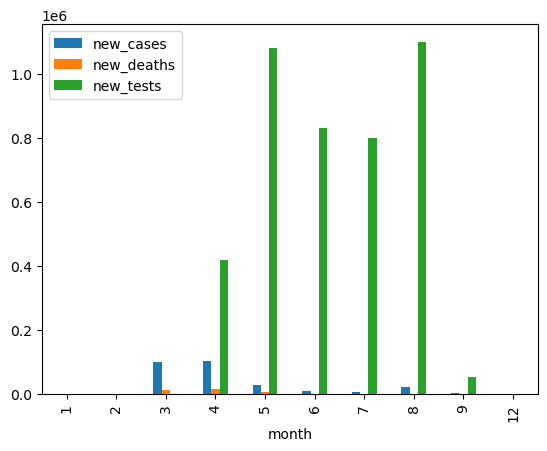

In [75]:
# Monthwise Data
monthly_grps[['new_cases', 'new_deaths', 'new_tests']].sum().plot(kind='bar')